In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

driving_data = pd.DataFrame({'x1' : [4, 20, 3, 19, 17, 8, 19, 18],
                            'x2' : [15, 13, 13, 4, 17, 11, 12, 6]})
driving_data

,x1,x2
0,4,15
1,20,13
2,3,13
3,19,4
4,17,17
5,8,11
6,19,12
7,18,6


In [6]:
from scipy.spatial.distance import pdist

dist = pdist(driving_data, metric = 'euclidean')

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [8]:
hc1 = linkage(dist, method = 'single')

In [9]:
hc2 = linkage(dist, method = 'complete')

In [10]:
hc3 = linkage(dist, method = 'average')

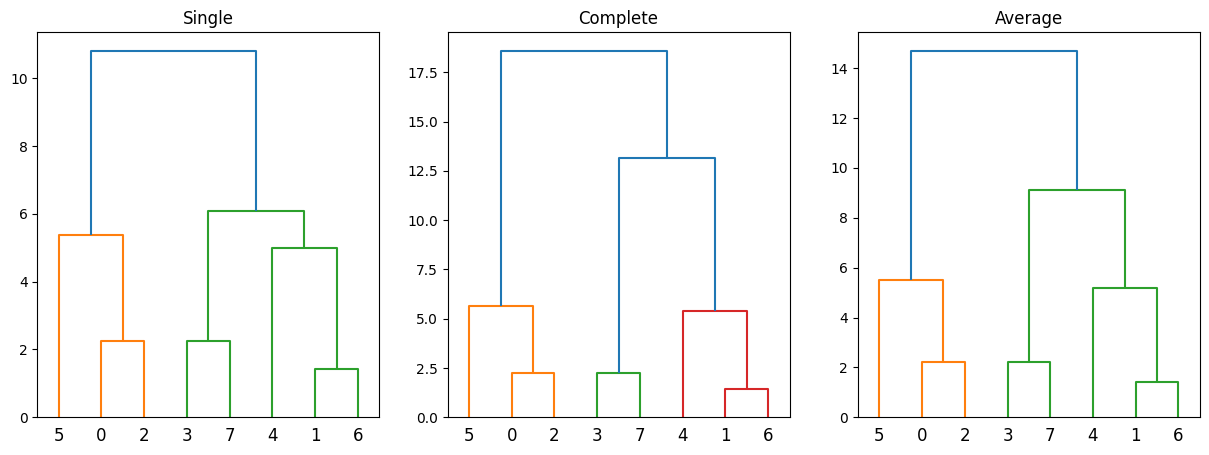

In [11]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
dendrogram_hc1 = dendrogram(hc1)
plt.title("Single")

plt.subplot(1, 3, 2)
dendrogram_hc2 = dendrogram(hc2)
plt.title("Complete")

plt.subplot(1, 3, 3)
dendrogram_hc3 = dendrogram(hc3)
plt.title("Average")

plt.show()

In [17]:
iris = pd.read_csv('/content/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
iris.isna().sum() # 결측값이 없음을 확인

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

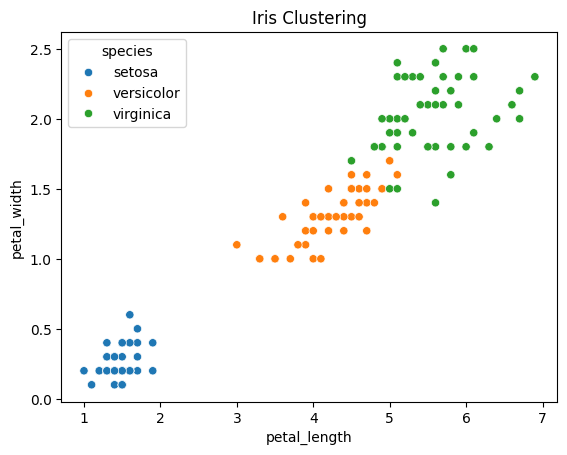

In [24]:
# 시각화 라이브러리 불러오기
import seaborn as sns

# hue는 구분 기준 설정
sns.scatterplot(x = 'petal_length', y = 'petal_width',
                hue = 'species', data = iris)
plt.title('Iris Clustering')
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터를 7:3 비율의 training, testing으로 분리하며 데이터는 랜덤하게 추출됨
training, testing = train_test_split(iris, test_size = 0.3, random_state = 42, stratify = iris['species'])

# 표준화를 수행하기 전 종속변수 species 열을 제외함
features = training.drop('species', axis = 1)

# 표준화 객체 생성
scaler = StandardScaler()

# 표준화 적용 -> 표준화 공식
features_scaled = scaler.fit_transform(features)

In [53]:
# Scaling된 데이터와 species 열 병합 시 원본 데이터의 인덱스와 매칭
features_scaled_df = pd.DataFrame(features_scaled, index = training.index, columns = features.columns)

# 데이터와 분리 과정에서 랜덤하게 추출된 데이터에 알맞은 species를 할당하기 위해 원본 데이터의 인덱스와 매칭
training_scaled = pd.concat([features_scaled_df, training['species']], axis = 1)

In [36]:
from sklearn.cluster import KMeans

# n_cluster는 군집 개수, max_iter는 군집화 반복횟수 10000번 설정
KMeans = KMeans(n_clusters = 3, max_iter = 10000, random_state = 42)

# 종속변수 species열을 제외한 독립변수들로 학습 수행
KMeans.fit(training_scaled.drop('species', axis = 1))

# cluster_centers_ 속성을 통해 각 클러스텉의 중심 좌쵸를 얻어냄
Centers = KMeans.cluster_centers_

# 중심 좌표를 데이터프레임으로 변환하여 출력
Centers_df = pd.DataFrame(Centers, columns = training_scaled.columns[:-1])
Centers_df.columns = training_scaled.columns[:-1]
Centers_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width
0,1.263694,0.201157,1.088624,1.079318
1,-1.030204,0.798743,-1.294688,-1.248323
2,-0.014389,-0.824136,0.335219,0.302221


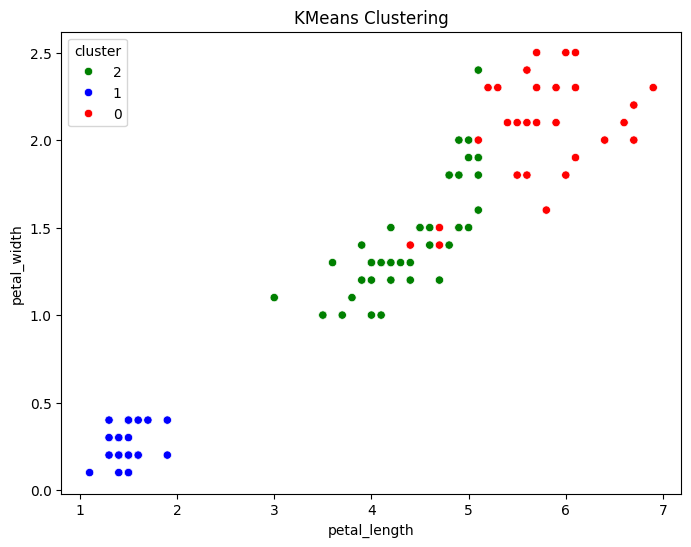

In [38]:
# astype을 통해 문자열 형태로 변환
training['cluster'] = KMeans.labels_.astype(str)

# 그래프 그리기
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'petal_length', y = 'petal_width',
                hue = 'cluster', palette = ['green', 'blue', 'red'], data = training) # 산점도
plt.title('KMeans Clustering')
plt.show()

In [39]:
# kmeans군집화 후 생긴 cluster열과 species열을 통해 교차표 생성
cross_tab = pd.crosstab(training['species'], training['cluster'])

# 교차표 출력
cross_tab

cluster,0,1,2
species,,,
setosa,0,35,0
versicolor,4,0,31
virginica,25,0,10


In [ ]:
from sklearn.cluster import KMeans

# 응집도 값을 저장할 리스트
inertia_values = []

# 군집 2개부터 15개까지의 응집도 값 저장
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, max_iter = 10000, random_state = 42)
    kmeans.fit(training_scaled.drop('species', axis = 1))
    inertia_values.append(kmeans.inertia_)

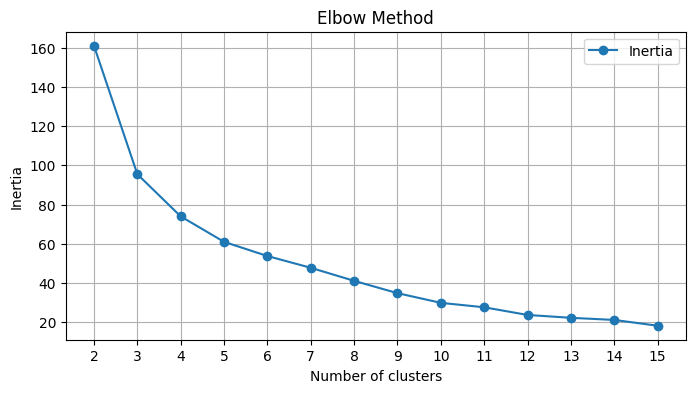

In [45]:
# 그래프 그리기
plt.figure(figsize = (8, 4))
plt.plot(range(2, 16), inertia_values, marker = 'o', label = 'Inertia')
plt.title('Elbow Method'), plt.xlabel('Number of clusters'), plt.ylabel('Inertia')
plt.xticks(range(2, 16)), plt.grid(True), plt.legend() # grid : 격자 생성
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# 실루엣 스코어 값을 저장할 리스트
silhouette_scores = []

# 2에서 15까지의 군집 수에 대한 실루엣 스코어를 계산
for i in range(2, 16):
    kmeans = KMeans(n_clusters = i, max_iter = 10000, random_state = 42)
    kmeans.fit(training_scaled.drop('species', axis = 1))

    # silhouette_score() 함수를 통해 스코어 계산
    score = silhouette_score(training_scaled.drop('species', axis = 1), kmeans.labels_)
    silhouette_scores.append(score)

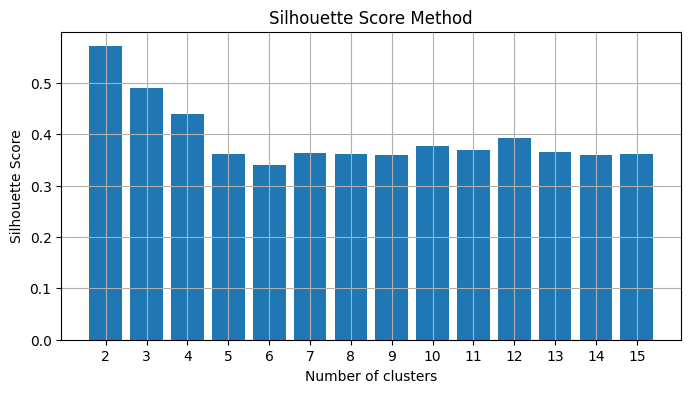

In [49]:
# 실루엣 스코어 시각화
plt.figure(figsize = (8, 4))
plt.bar(range(2, 16), silhouette_scores), plt.title('Silhouette Score Method'),
plt.xlabel("Number of clusters"), plt.ylabel('Silhouette Score'), plt.xticks(range(2, 16)), plt.grid(True)
plt.show()